In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

f1 = pd.read_csv('DCT_withoutduplicate 1.csv')
X = f1.iloc[:, :-1].values  # Feature matrix
Y = f1.iloc[:, -1].values #labels
centroids = {}
intraspread = {}
def compute_centroids(X,Y):
    classes = np.unique(Y)
    for cls in classes:
        samples = X[Y==cls]
        centroids[cls]=np.mean(samples, axis=0)
    return centroids
def compute_intraspread(X,Y,centroids):
    for cls,centroids in centroids.items():
        samples = X[Y==cls]
        dist = np.linalg.norm(samples - centroids , axis=1)
        intraspread[cls] = np.mean(dist)
    return intraspread

def interclass_distances(centroids):
    classes = list(centroids.keys())
    distances = {}

    for i, cls1 in enumerate(classes):
        for cls2 in classes[i+1:]:
            dist = np.linalg.norm(centroids[cls1] - centroids[cls2])
            distances[(cls1, cls2)] = dist
    
    return distances

    
cent = compute_centroids(X,Y)
spr = compute_intraspread(X,Y,centroids)
interclass_dist = interclass_distances(centroids)
print("the centroid is as follows\n\n\n",cent)
print("\n\nthe intraspread is as follows\n\n",spr)
print("\n\n the interclass distance is as follows:\n\n",interclass_dist)

the centroid is as follows


 {3333: array([ 3.50219715e+04,  3.09444505e+01,  3.94544340e+01,  2.39719324e+03,
        6.73416964e+01,  2.57414194e+03, -1.68619915e+01,  1.29005681e+01,
        6.35060136e+00, -4.22674245e+01, -6.36430047e+02, -1.55073295e+02,
       -2.44923726e+03, -1.48058617e+02, -9.78473386e+02, -8.97400280e+01,
       -1.11563771e+02, -7.82612478e+01, -8.33186550e+01, -8.15555163e+01,
       -5.71929161e+01, -7.43676790e+01,  1.40504455e+02,  4.65734123e+02,
        2.87455679e+02,  7.39386113e+02,  7.82807609e+01,  6.45908939e+01,
        1.39873888e+02,  1.22408121e+02,  1.94961260e+02,  2.65894077e+02,
        2.16260295e+02,  1.80612947e+02,  9.37405289e+01,  1.34293096e+02,
        5.60480719e+01, -9.59279554e+01,  1.68442699e+02, -2.31665243e+02,
        1.34798573e+02, -1.69452056e+02,  5.87672528e+01, -1.59803253e+01,
        1.28935856e+02, -7.47109901e+01, -9.21034316e+01, -2.05635229e+02,
       -2.41288107e+02, -2.47929468e+02, -2.53955201e+02, -2.10

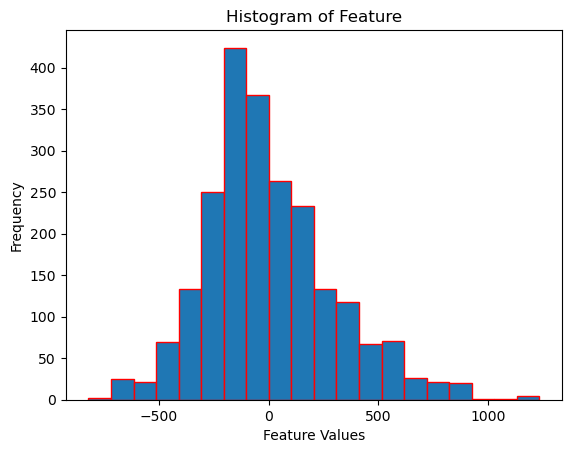

Mean of the feature: 0.11981836454933141
Variance of the feature: 85263.52346963258


In [23]:
import matplotlib.pyplot as plt
feature=f1['111']
feature = np.array(feature, dtype=float)
hist, bin_edges = np.histogram(feature, bins=20)
plt.hist(feature, bins=20, edgecolor='red')  # Adjust 'bins' for the desired number of buckets
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

mean = np.mean(feature)
print(f'Mean of the feature: {mean}')

variance = np.var(feature)
print(f'Variance of the feature: {variance}')

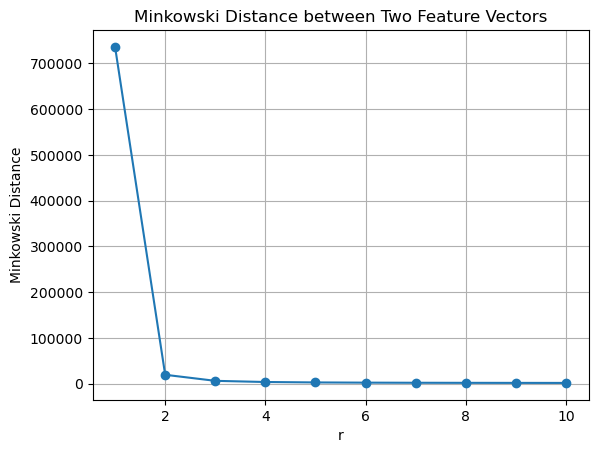

In [27]:
feat1 = f1['120'].values
feat2= f1['140'].values
distances = []

# Calculate Minkowski distance for r from 1 to 10
for r in range(1, 11):
    dist = np.sum(np.abs(feat1 - feat2) ** r) ** (1/r)
    distances.append(dist)

# Plot the distances
plt.plot(range(1, 11), distances, marker='o')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.grid(True)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
f1['LABEL'] = f1['LABEL'].astype(str)
# Filter f1 to include only rows with labels '3333' or '3334'
f2 = f1[f1['LABEL'].isin(['3333', '3334'])]

feature_columns = [col for col in f2.columns if col != 'LABEL']

X = f2[feature_columns].values
y = f2['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (62, 196)
X_test shape: (27, 196)
y_train shape: (62,)
y_test shape: (27,)


In [67]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a kNN classifier with k = 3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
neigh.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = neigh.predict(X_test)

# Test the accuracy of the kNN classifier on the test set
accuracy = neigh.score(X_test, y_test)

# Print the accuracy
print(f"Accuracy of kNN on the test set: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Predicted classes for the test set:")
print(y_pred)

test_vect = X_test[0] # Selecting a specific test vector

# Predicting the class for this single test vector
single_prediction = neigh.predict([test_vect])

# Print the prediction
print(f"Predicted class for the first test vector: {single_prediction[0]}")



Accuracy of kNN on the test set: 96.30%

Classification Report:
              precision    recall  f1-score   support

        3333       1.00      0.94      0.97        17
        3334       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

Predicted classes for the test set:
['3333' '3333' '3334' '3333' '3333' '3333' '3333' '3334' '3333' '3334'
 '3333' '3334' '3334' '3333' '3333' '3333' '3334' '3334' '3333' '3333'
 '3334' '3334' '3333' '3333' '3333' '3334' '3334']
Predicted class for the first test vector: 3333


Accuracy for k = 3: 96.30%
Accuracy for k = 1: 100.00%
Accuracy for k = 2: 100.00%
Accuracy for k = 3: 96.30%
Accuracy for k = 4: 96.30%
Accuracy for k = 5: 92.59%
Accuracy for k = 6: 92.59%
Accuracy for k = 7: 92.59%
Accuracy for k = 8: 92.59%
Accuracy for k = 9: 92.59%
Accuracy for k = 10: 77.78%
Accuracy for k = 11: 81.48%


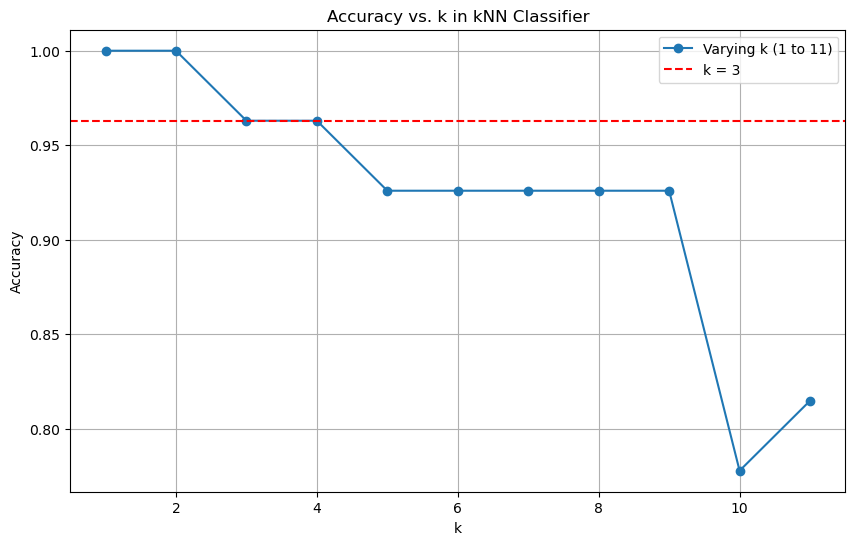

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train the kNN classifier with k = 3
knn_fixed = KNeighborsClassifier(n_neighbors=3)
knn_fixed.fit(X_train, y_train)
y_pred_fixed = knn_fixed.predict(X_test)
# Calculate accuracy for k = 3
accuracy_fixed = accuracy_score(y_test, y_pred_fixed)
print(f"Accuracy for k = 3: {accuracy_fixed * 100:.2f}%")


# List to store accuracy for each value of k
accuracies = []

# Range of k values from 1 to 11
k_values = range(1, 12)

for k in k_values:
    # Create a kNN classifier with the current value of k
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training set
    neigh.fit(X_train, y_train)
    
    # Predict the labels on the test set
    y_pred = neigh.predict(X_test)
    
    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print the accuracy for each k
    print(f"Accuracy for k = {k}: {accuracy * 100:.2f}%")


# Plotting the accuracies for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Varying k (1 to 11)')
plt.axhline(y=accuracy_fixed, color='r', linestyle='--', label='k = 3')

plt.title('Accuracy vs. k in kNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [78]:
y_train_pred = knn_fixed.predict(X_train)
y_test_pred = knn_fixed.predict(X_test)

# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training Data:\n", cm_train)

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix - Test Data:\n", cm_test)

# Classification report for training data
report_train = classification_report(y_train, y_train_pred)
print("Classification Report - Training Data:\n", report_train)

# Classification report for test data
report_test = classification_report(y_test, y_test_pred)
print("Classification Report - Test Data:\n", report_test)

Confusion Matrix - Training Data:
 [[34  1]
 [ 0 27]]
Confusion Matrix - Test Data:
 [[16  1]
 [ 0 10]]
Classification Report - Training Data:
               precision    recall  f1-score   support

        3333       1.00      0.97      0.99        35
        3334       0.96      1.00      0.98        27

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62

Classification Report - Test Data:
               precision    recall  f1-score   support

        3333       1.00      0.94      0.97        17
        3334       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

